<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/halloween-seminar-2023/blob/main/1_notebooks/chapter-08-01.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Pre-trained LLM

## What are Pre-trained Language Models?

Pre-trained language models are machine learning models that have been trained on large amounts of text data and can be fine-tuned for specific natural language processing (NLP) tasks. These models learn general language features, such as grammar, syntax, and semantics, which can be adapted to various NLP tasks, such as sentiment analysis, named entity recognition, and text summarization.

Examples of Pre-trained Language Models
Some popular pre-trained language models include:

- BERT (Bidirectional Encoder Representations from Transformers)
- GPT-3 (Generative Pre-trained Transformer 3)
- RoBERTa (Robustly optimized BERT approach)
- T5 (Text-to-Text Transfer Transformer)
- OpenAI Codex

These pre-trained models serve as a valuable starting point for building more specialized models or solving specific tasks without the need for extensive training from scratch.

## What is Transfer Learning

**Transfer learning** is a machine learning technique where a pre-trained model is adapted for a new, but similar problem. One of the key steps in transfer learning is the ability to freeze the layers of the pre-trained model so that only some portions of the network are updated during training. Freezing is crucial when you want to maintain the features that the pre-trained model has already learned.

Transfer learning leverages the idea that the **knowledge learned from solving one task can be beneficial for solving a different task, even if the two tasks are not exactly the same**. By using pre-trained models as a starting point, the process of training a new model for a target task becomes more efficient and often requires less data.

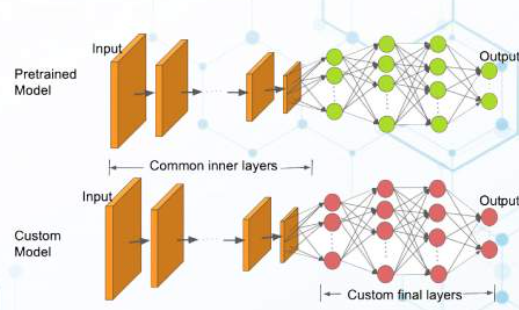

### Transfer Learning Steps

- **Pre-training**: Initially, a model is trained on a large-scale dataset and a complex task, such as image recognition on a large collection of images. This pre-training step requires significant computational resources and is often performed on high-performance hardware.

- **Feature Extraction**: After pre-training, the model’s parameters (weights and biases) are saved. The pre-trained model is used as a feature extractor to obtain meaningful representations or features from the data for the target task. For example, in computer vision, the model can extract high-level features like edges, textures, or shapes from images.

- **Fine-tuning**: The pre-trained model’s feature extractor is combined with a new, shallow layer (or a few layers) that is specific to the target task. This new layer is randomly initialized or initialized with small weights. The entire model is then fine-tuned using the data from the target task. During fine-tuning, the new layer’s parameters are updated, while the parameters of the pre-trained layers may be updated as well or frozen to retain their knowledge.

## BERT

Back in 2018, Google developed a powerful Transformer-based machine learning model for NLP applications that outperforms previous language models in different benchmark datasets. And this model is called BERT.

BERT is an acronym for Bidirectional Encoder Representations from Transformers. 

BERT architecture consists of several Transformer encoders stacked together. Each Transformer encoder encapsulates two sub-layers: a self-attention layer and a feed-forward layer.

There are two different BERT models:

- BERT base, which is a BERT model consists of 12 layers of Transformer encoder, 12 attention heads, 768 hidden size, and 110M parameters.

- BERT large, which is a BERT model consists of 24 layers of Transformer encoder,16 attention heads, 1024 hidden size, and 340 parameters.

It is pre-trained on unlabeled data mainly extracted from BooksCorpus, which has 800M words, and from Wikipedia, which has 2,500M words.
As the name suggests, it is pre-trained by utilizing the **bidirectional** nature of the encoder stacks. This means that BERT learns information from a sequence of words not only from left to right, but also from right to left.

## BERT Tokenizer

This code uses the Hugging Face Transformers library to tokenize text using the BERT tokenizer.

In [1]:
#!pip install transformers

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text = "BERT preprocessing is essential."
tokens = tokenizer.tokenize(text)

print(tokens)

### Example: Sentiment Analysis with BERT

**Distilled Models**

A distilled language model, often referred to as a "distilled model," is a smaller and more computationally efficient version of a larger, pre-existing language model. The process of distillation involves training a compact model to mimic the behavior and knowledge of a larger, more powerful model. The goal is to create a smaller model that retains much of the original model's performance while being more resource-efficient and faster for inference.

The general steps in creating a distilled language model are as follows:

1. **Teacher Model**: Start with a large, state-of-the-art language model, which is often referred to as the "teacher model." This teacher model is a highly capable model with a large number of parameters and significant computational requirements.

2. **Student Model**: Create a smaller model, called the "student model," that has a reduced number of parameters and is more lightweight. The student model is designed to mimic the teacher model's behavior.

3. **Distillation**: Train the student model using a distillation process. During training, the student model learns to predict the same or similar outputs as the teacher model. This is typically done by minimizing the difference between the student model's predictions and the teacher model's predictions on a given dataset, often with a loss function that encourages similarity in output distributions.

4. **Knowledge Transfer**: The teacher model's knowledge and linguistic capabilities are effectively transferred to the student model. This includes learning patterns, language understanding, and contextual information.

The benefits of distilled language models are as follows:

1. **Reduced Size**: Distilled models are significantly smaller in terms of the number of parameters, making them more memory-efficient and suitable for deployment in resource-constrained environments.

2. **Faster Inference**: Smaller models generally perform inference faster, which is crucial for applications where real-time or near-real-time responses are required.

3. **Comparable Performance**: The goal of distillation is to ensure that the student model's performance is close to that of the teacher model. While it may not achieve the exact performance, it should still perform well on various natural language processing tasks.

4. **Deployment**: Smaller, distilled models are easier to deploy on edge devices, mobile applications, and in scenarios where computational resources are limited.

Distilled language models have become popular as they strike a balance between model size and performance, making them more practical for a wide range of applications. They are particularly useful in scenarios where the original, larger models are too resource-intensive to deploy. In the next example we are going to use the [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) which is tuned with the [SST-2](https://huggingface.co/datasets/sst2) dataset. 

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

In [ ]:
# Load pre-trained BERT tokenizer and model for sentiment classification
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

In [ ]:
# input text for classification
sentence_a = 'i love this product, it helped me alot'
sentence_b = 'this does not work for me'

Let’s see the tokenizer in action. We provide two sentences to the tokenizer and it returns a **dictionary**.

In [ ]:
# Tokenize and encode the input text
inputs = tokenizer([sentence_a, sentence_b], return_tensors='pt', padding=True)
inputs

The first key is `input_ids` and its value consist of integers which are tokenized representations of the original words in the sentence. In each sequence of tokens, there are two special tokens that BERT would expect as an input:

- **[CLS]**: This is the first token of every sequence, which stands for classification token.

- **[SEP]**: This is the token that makes BERT know which token belongs to which sequence. This special token is mainly important for a next sentence prediction task or question-answering task. If we only have one sequence, then this token will be appended to the end of the sequence.

The token `101` and `102` is the **start of sentence** and **end of sentence** token respectively. 

The maximum size of tokens that can be fed into BERT model is 512. If the tokens in a sequence are less than 512, we can use padding to fill the unused token slots with [PAD] token. If the tokens in a sequence are longer than 512, then we need to do a truncation.**The token 0 is the padding token** used to ensure that the length of both sequences are the same.

The second key `attention_mask` is an array of binary values. Each position of the attention_mask corresponds to a token in the same position in `the input_ids`. ***1 indicates that the token at the given position should be attended to and 0 indicates that the token at the given position is a padded value***.

In [ ]:
# Perform inference with the model
# Note: In Python, the ** syntax is used for unpacking keyword arguments from a dictionary. 
# In this context, it's used to pass the inputs dictionary to the model as keyword arguments.
outputs = model(**inputs)

The instruction `torch.argmax(outputs.logits, dim=1)` is used to find the indices of the maximum values along the second dimension of the `outputs.logits` tensor. This is often used in classification tasks to determine the predicted class or label based on the model's raw scores (logits). Each row of the output tensor corresponds to a different example or data point, and the index of the maximum value in each row indicates the predicted class for that example. See [here](https://huggingface.co/transformers/v3.1.0/main_classes/output.html) for a complete description of the output structure of a PyTorch Model.

In [ ]:
torch.argmax(outputs.logits, dim=1)

In [ ]:
inputs = tokenizer(sentence_a, return_tensors='pt', padding=True)

In [ ]:
# Perform inference with the model
outputs = model(**inputs)

In [ ]:
# Get the predicted class label
predicted_class = torch.argmax(outputs.logits, dim=1).item()

In [ ]:
# Define class labels
class_labels = ['Negative', 'Positive']

In [ ]:
# Print the predicted sentiment
print(f"The sentiment of the text is: {class_labels[predicted_class]}")

With `pipeline` it is possible to build a sentiment analysis model with just 3 lines of code!

In [ ]:
from transformers import pipeline

sentiment = pipeline(task = 'sentiment-analysis', framework='pt', model = 'distilbert-base-uncased-finetuned-sst-2-english')
results = sentiment('i am in a very bad mood today')
results

## Text Classification with BERT

In this section, we’re going to use the BBC News Classification dataset. If you want to follow along, you can download the dataset on [Kaggle](https://www.kaggle.com/datasets/sainijagjit/bbc-dataset).

For details please refer to the article of **Ruben Winastwan** quoted in the Reference and Credit Section from which this section is taken.

This dataset is already in CSV format and it has 2126 different texts, each labeled under one of 5 categories: entertainment, sport, tech, business, or politics. Let’s take a look at what the dataset looks like.

In [ ]:
import pandas as pd

datapath = './data/bbc-text.csv'
df = pd.read_csv(datapath)
df.head()

In [ ]:
df.groupby(['category']).size().plot.bar()

As you can see, the dataframe only has two columns, which is category that will be our label, and text which will be our input data for BERT.

### Preprocessing Data

As you might already know from the previous section, we need to transform our text into the format that BERT expects by adding [CLS] and [SEP] tokens. We can do this easily with BertTokenizer class from Hugging Face.

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

#example_text = 'I will watch Memento tonight'
example_text ='''
This code essentially trains a neural network model for a specified number of epochs using training and validation datasets, 
while keeping track of accuracy and loss. The model is updated using backpropagation and the Adam optimizer during each epoch.
'''
bert_input = tokenizer(example_text,padding='max_length', max_length = 60, 
                       truncation=True, return_tensors="pt")


print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])

Here is the explanation of BertTokenizer parameters above:

- `padding` : to pad each sequence to the maximum length that you specify.
- `max_length` : the maximum length of each sequence. In this example we use 10, but for our actual dataset we will use 512, which is the maximum length of a sequence allowed for BERT.
- `truncation` : if True, then the tokens in each sequence that exceed the maximum length will be truncated.
- `return_tensors` : the type of tensors that will be returned. Since we’re going to use **Pytorch**, then we use **pt**. If you use **Tensorflow**, then you need to use **tf**.

The first row is `input_ids` , which is the id representation of each token. We can actually decode these input ids into the actual tokens as follows:

In [ ]:
example_text = tokenizer.decode(bert_input.input_ids[0])

print(example_text)

As you can see, the `BertTokenizer` takes care of all of the necessary transformations of the input text such that it’s ready to be used as an input for our BERT model. It adds [CLS], [SEP], and [PAD] tokens automatically. Since we specified the maximum length to be 10, then there are only two [PAD] tokens at the end.

The second row is `token_type_ids`, which is a binary mask that identifies in which sequence a token belongs. If we only have a single sequence, then all of the token type ids will be 0. For a text classification task, `token_type_ids` is an optional input for our BERT model.

Finally, the third row is `attention_mask`, which is a binary mask that identifies whether a token is a real word or just padding. If the token contains [CLS], [SEP], or any real word, then the mask would be 1. Meanwhile, if the token is just padding or [PAD], then the mask would be 0.

Let's refer to the course slides to understand why in a classification task **it is sufficient to focus on the embedding of the 
CLS token**. For further information on this topic you can usefully consult the Reference and Credits section

### Dataset Class

Now that we know what kind of output that we will get from BertTokenizer , let’s build a Dataset class for our news dataset that will serve as a class to generate our news data.

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. 

**Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples**.

For further details see the original tutorial of PyTorch [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer

'''
The class Dataset subclass the torch class Dataset. This Dataset class is designed to facilitate 
the handling of text data for a classification task. It processes the text using a tokenizer, 
converts labels to numeric values, and allows easy access to batches of data through methods like 
get_batch_labels and get_batch_texts. It can be used with PyTorch's data loaders to efficiently 
load and preprocess data for training deep learning models.
'''
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {'business'     :0,
          'entertainment':1,
          'sport'        :2,
          'tech'         :3,
          'politics'     :4
          }

class Dataset(torch.utils.data.Dataset):
    #___________________________________________________________________________________________________________________
    #
    '''
    The class constructor initializes the dataset. It takes a DataFrame (df) as input, which contains the data 
    to be used for training or evaluation. This data might include text and corresponding labels. Within the 
    constructor:
    - self.labels: stores a list of labels. These labels are extracted from the 'category' column of the DataFrame df. 
                   The assumption here is that labels is a dictionary mapping label names to numeric values, and this 
                   mapping is used to convert label names into numeric labels.
    - self.texts:  stores a list of processed text samples. Each text sample is processed using a tokenizer 
                   (in this example BertTokenizer). The text is tokenized and converted into a PyTorch tensor with 
                   specified properties like padding, truncation, and maximum length. 
    '''
    def __init__(self, df):
        self.labels = [labels[label] for label in df['category']]
        self.texts  = [tokenizer(text, 
                                 padding='max_length', 
                                 max_length = 512, 
                                 truncation=True,
                                 return_tensors="pt") for text in df['text']]
    #___________________________________________________________________________________________________________________
    #
    '''
    This method returns the list of labels stored in the self.labels attribute. 
    It's essentially a getter method for the labels.
    '''
    def classes(self):
        return self.labels

    #___________________________________________________________________________________________________________________
    #
    '''
    This method returns the length of the dataset, which is determined by the number of labels. 
    It returns the length of the self.labels list
    '''
    def __len__(self):
        return len(self.labels)
    #___________________________________________________________________________________________________________________
    #
    '''
    This method takes an index idx as input and returns the labels for a specific batch of data. 
    It fetches the labels for the data at the specified index idx.
    '''
    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])
    #___________________________________________________________________________________________________________________
    #
    '''
    This method, similar to get_batch_labels, takes an index idx and returns the preprocessed text samples 
    for a specific batch of data.
    '''
    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]
    #___________________________________________________________________________________________________________________
    #
    '''
    This method is used for data retrieval. It takes an index idx as input, retrieves the preprocessed 
    text samples and labels for a specific batch of data based on the index, and returns them as a tuple.
    '''
    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In the above implementation, we define a variable called `labels` , which is a dictionary that maps the category in the dataframe into the id representation of our label. Notice that we also call `BertTokenizer` in the `__init__` function above to transform our input texts into the format that BERT expects.

After defining dataset class, let’s split our dataframe into training, validation, and test set with the proportion of 80:10:10.

In [ ]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

### Model Building

When we instantiate a model with `from_pretrained()`, the model configuration and pre-trained weights of the specified model are used to initialize the model. The library also includes a number of task-specific final layers or ‘heads’ whose weights are instantiated randomly when not present in the specified pre-trained model. For example, instantiating a model with `BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)` will create a BERT model instance with encoder weights copied from the bert-base-uncased model and a randomly initialized sequence classification head on top of the encoder with an output size of 2. 

> **NOTE**. In PyTorch, you always need to define a `forward` method for your neural network model. But you never have to call `model.forward(x)`. The `super(BertClassifier, self).__init__()` refers to the fact that this is a subclass of `nn.Module` and is inheriting all methods. In the super class, `nn.Module`, there is a `__call__` method which obtains the forward function from the subclass and calls it. For further details see the original documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). 

In [ ]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert    = BertModel.from_pretrained('bert-base-cased')
        #
        # We add three layers on top of BERT model
        #
        # During training, the Dropout layer, randomly zeroes some of the elements of the input tensor with 
        # probability p using samples from a Bernoulli distribution. This has proven to be an effective technique 
        # for regularization and preventing the co-adaptation of neurons as described in the paper 
        # "Improving neural networks by preventing co-adaptation of feature detectors".
        self.dropout = nn.Dropout(dropout)
        # This is a simple linear layer which takes as input a BERT vector (768 dim) and as output a 5-dim real vector
        # Remember that we have 5 categories to classify our news
        self.linear  = nn.Linear(768, 5)
        # Finally a relu layer is added
        self.relu    = nn.ReLU()

    def forward(self, input_id, mask):
        #
        # We first feed both sequence tokens and attention masks to the bert layer and get the contextualized embeddings 
        # (hidden representations) of each token. 
        # return_dict=False: This argument specifies that the BERT model should not return the outputs in the form of a 
        # dictionary. Instead, it returns two values, the first of which is discarded (indicated by _), and the second value, 
        # pooled_output, is kept. In particular contains the embedding vector of [CLS] token. For a text classification task, 
        # it is enough to use this embedding as an input for our classifier.
        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        # We then pass the pooled_output variable into a linear layer with ReLU activation function. At the end of the linear 
        # layer, we have a vector of size 5, each corresponds to a category of our labels (sport, business, politics, 
        # entertainment, and tech).
        dropout_output   = self.dropout(pooled_output)
        linear_output    = self.linear(dropout_output)
        final_layer      = self.relu(linear_output)

        return final_layer

The `Dataset` retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting. `DataLoader` is an iterable that abstracts this complexity for us in an easy API. When we have loaded that dataset into the `DataLoader`, we can iterate through the dataset as needed. Each iteration returns a batch of `train_features` and `train_labels` (containing `batch_size` features and labels respectively). Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled.

> **Note: Why do we need to call zero_grad in PyTorch**. In PyTorch, for every mini-batch during the training phase, we typically want to explicitly set the gradients to zero before starting to do backpropagation (i.e., updating the Weights and biases) because PyTorch accumulates the gradients on subsequent backward passes. This accumulating behavior is convenient while training RNNs or when we want to compute the gradient of the loss summed over multiple mini-batches. So, the default action has been set to accumulate (i.e. sum) the gradients on every loss.backward() call. Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly. *Otherwise, the gradient would be a combination of the old gradient, which you have already used to update your model parameters and the newly-computed gradient. It would therefore point in some other direction than the intended direction towards the minimum (or maximum, in case of maximization objectives)*. 

In [ ]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):
    
    # Next line creates two datasets, train and val, from the training and validation data, respectively. 
    # That these datasets are prepared using the custom Dataset class previously defined. 
    train, val = Dataset(train_data), Dataset(val_data)
    
    # Here, data loaders are created for both the training and validation datasets using PyTorch's DataLoader class. 
    # These data loaders are used to efficiently load and process data in mini-batches during training. 
    # Each mini-batch has a batch size of 2, and the training data is shuffled.
    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader   = torch.utils.data.DataLoader(val,   batch_size=2)
    
    # We check for a GPU is available, if not we proceed with a CPU
    use_cuda = torch.cuda.is_available()
    # The torch.device enables you to specify the device type responsible to load a tensor into memory. 
    # The function expects a string argument specifying the device type.
    device   = torch.device("cuda" if use_cuda else "cpu")

    # Here, the loss function (criterion) is defined as cross-entropy loss, which is often used for classification tasks. 
    # Additionally, the optimizer (Adam) is initialized with the model's parameters and the specified learning rate. 
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:
            model     = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):
            # initiates a loop over the specified number of training epochs.
            total_acc_train  = 0
            total_loss_train = 0
            #
            # TRAINING Phase
            #
            # This inner loop iterates through mini-batches of training data using the train_dataloader. 
            # tqdm is a library used for creating progress bars.
            for train_input, train_label in tqdm(train_dataloader):
                # For each mini-batch, the labels, attention masks (mask), and input IDs (input_id) are extracted from the train_input. 
                # These tensors are also moved to the specified device (CPU in this case).
                train_label = train_label.to(device)
                mask        = train_input['attention_mask'].to(device)
                input_id    = train_input['input_ids'].squeeze(1).to(device)
                # The model is called with the input data (input_id and mask) to obtain predictions (output) for the current 
                # mini-batch.
                output = model(input_id, mask)
                # The batch loss is calculated using the cross-entropy loss (criterion) and accumulated to the total_loss_train.
                batch_loss        = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                # Accuracy is calculated by comparing the model's predictions to the ground truth labels, and the correct predictions 
                # are accumulated to total_acc_train.
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc
                # Zero out the gradients (see the above note), backpropagate the batch loss, and update the 
                # model's parameters using the optimizer.
                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            #
            # VALIDATION phase
            #
            # Initialize variables to accumulate validation accuracy and loss.
            total_acc_val = 0
            total_loss_val = 0
            # Temporarily disable gradient tracking for the validation phase
            with torch.no_grad():
                # Loop through mini-batches of validation data.
                for val_input, val_label in val_dataloader:
                    # Extract and move validation data to the specified device.
                    val_label = val_label.to(device)
                    mask      = val_input['attention_mask'].to(device)
                    input_id  = val_input['input_ids'].squeeze(1).to(device)
                    # The code then passes the preprocessed input data and mask to a neural 
                    # network model (model) to obtain predictions.
                    output = model(input_id, mask)
                    # The code calculates the loss for the mini-batch. It uses a defined loss function (criterion, 
                    # in this case CrossEntropyLoss) to compare the model's predictions (output) with the actual 
                    # validation labels (val_label). This loss is computed as batch_loss. 
                    batch_loss      = criterion(output, val_label.long())
                    # The code accumulates the batch loss (batch_loss) into a running total, total_loss_val.
                    total_loss_val += batch_loss.item()
                    # It also calculates the accuracy for the mini-batch. The accuracy is determined by comparing 
                    # the model's predicted class (argmax of the output) to the actual validation labels, summing 
                    # up the correct predictions, and adding it to the running total, total_acc_val. After this 
                    # loop completes (after all mini-batches have been processed), total_loss_val will contain 
                    # the total validation loss, and total_acc_val will contain the total number of correct 
                    # predictions for the entire validation dataset. These metrics can be used to evaluate the 
                    # performance of the model on the validation data.
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  
EPOCHS = 5
model = BertClassifier()
LR = 1e-6
              
train(model, df_train, df_val, LR, EPOCHS)


In [ ]:
print("Done!")

### Evaluate Model on Test Data

Now that we have trained the model, we can use the test data to evaluate the model’s performance on unseen data. Below is the function to evaluate the performance of the model on the test set.

In [ ]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask       = test_input['attention_mask'].to(device)
              input_id   = test_input['input_ids'].squeeze(1).to(device)

              output     = model(input_id, mask)

              acc        = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    
evaluate(model, df_test)

## References and Credits

- Rayyan Shaikh, **[Mastering BERT: A Comprehensive Guide from Beginner to Advanced in Natural Language Processing](https://medium.com/@shaikhrayyan123/a-comprehensive-guide-to-understanding-bert-from-beginners-to-advanced-2379699e2b51)**, Medium Blog
---
- Ruben Winastwan, **[Text Classification with BERT in PyTorch](https://towardsdatascience.com/text-classification-with-bert-in-pytorch-887965e5820f)**, Medium Blog
---
Hugging Face, **[Documentation on Transformers](https://huggingface.co/transformers/v3.3.1/training.html)**

Hugging Face, **[Documentation on BERT Model](https://huggingface.co/docs/transformers/model_doc/bert)**

- [What is purpose of the [CLS] token and why is its encoding output important?](https://datascience.stackexchange.com/questions/66207/what-is-purpose-of-the-cls-token-and-why-is-its-encoding-output-important)

- [Paper Dissected: “BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding” Explained](https://datasciencetoday.net/index.php/en-us/nlp/211-paper-dissected-bert-pre-training-of-deep-bidirectional-transformers-for-language-understanding-explained)

- [A Visual Guide to Using BERT for the First Time](http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/) by Jay Alammar

- [Painless Fine-Tuning of BERT in Pytorch](https://medium.com/swlh/painless-fine-tuning-of-bert-in-pytorch-b91c14912caa) by Kabir Ahuja

- [BERT Fine-Tuning Tutorial with PyTorch](https://mccormickml.com/2019/07/22/BERT-fine-tuning/) by Chris McCormick and Nick Ryan